In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_confusion_matrix, roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('marketing_campaign.csv',sep=';')

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]

In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
from datetime import datetime,date
today=date.today()
df['Age']=today.year - df.Year_Birth

In [9]:
df['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2240, dtype: int64>

In [10]:
df[df['Age'] > 80]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192    7829        1900  2n Cycle       Divorced  36640.0        1         0   
239   11004        1893  2n Cycle         Single  60182.0        0         1   
339    1150        1899       PhD       Together  83532.0        0         0   
424    6932        1941       PhD        Married  93027.0        0         0   
1950   6663        1940       PhD         Single  51141.0        0         0   

     Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
192   2013-09-26       99        15  ...             0             0   
239   2014-05-17       23         8  ...             0             0   
339   2013-09-26       36       755  ...             0             0   
424   2013-04-13       77      1285  ...             0             0   
1950  2013-07-08       96       144  ...             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
192              0             0             0         1              3   
239              0             0             0         0              3   
339              1             0             0         0              3   
424              1             0             0         0              3   
1950             0             0             0         0              3   

      Z_Revenue  Response  Age  
192          11         0  122  
239          11         0  129  
339          11         0  123  
424          11         0   81  
1950         11         0   82  

[5 rows x 30 columns]

In [11]:
df.drop([192,239,339,424,1950], inplace=True)

In [12]:
df['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2235, dtype: int64>

In [13]:
df.Education.value_counts()

Graduation    1124
PhD            483
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [14]:
df['Education'].replace({'Graduation':'Graduation','PhD':'Graduation','Master':'Graduation','2n Cycle':'Ungraduation','Basic':'Graduation'},inplace=True)

In [15]:
df.Education.value_counts()

Graduation      2031
Ungraduation     201
Name: Education, dtype: int64

In [16]:
df.Marital_Status.value_counts()

Married     863
Together    579
Single      478
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [17]:
df['Marital_Status'].replace({'Married':'Couple','Together':'Couple','Single':'Single','Divorced':'Single','Widow':'Single','Alone':'Single','Absurd':'Single','YOLO':'Single'},inplace=True)

In [18]:
df.Marital_Status.value_counts()

Couple    1442
Single     793
Name: Marital_Status, dtype: int64

In [19]:
df.Income.value_counts()

7500.0     12
35860.0     4
67445.0     3
34176.0     3
80134.0     3
           ..
51124.0     1
74250.0     1
40760.0     1
41452.0     1
52869.0     1
Name: Income, Length: 1969, dtype: int64

In [20]:
df['totalchi']=(df['Kidhome']+df['Teenhome'])

In [21]:
df['totalchi'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: totalchi, Length: 2235, dtype: int64>

In [22]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [23]:
df['Numof']=datetime.now()-df.Dt_Customer
df['Numof']=df['Numof']/np.timedelta64(1,'Y')

In [24]:
df['Numof'].value_counts

<bound method IndexOpsMixin.value_counts of 0       10.071789
1        8.565941
2        9.110784
3        8.637126
4        8.697360
          ...    
2235     9.299700
2236     8.308577
2237     8.680933
2238     8.683671
2239     9.959535
Name: Numof, Length: 2235, dtype: float64>

In [25]:
df['Recency'].value_counts

<bound method IndexOpsMixin.value_counts of 0       58
1       38
2       26
3       26
4       94
        ..
2235    46
2236    56
2237    91
2238     8
2239    40
Name: Recency, Length: 2235, dtype: int64>

In [26]:
df['MntWines'].value_counts

<bound method IndexOpsMixin.value_counts of 0       635
1        11
2       426
3        11
4       173
       ... 
2235    709
2236    406
2237    908
2238    428
2239     84
Name: MntWines, Length: 2235, dtype: int64>

In [27]:
df['MntFruits'].value_counts

<bound method IndexOpsMixin.value_counts of 0       88
1        1
2       49
3        4
4       43
        ..
2235    43
2236     0
2237    48
2238    30
2239     3
Name: MntFruits, Length: 2235, dtype: int64>

In [28]:
df['MntMeatProducts'].value_counts

<bound method IndexOpsMixin.value_counts of 0       546
1         6
2       127
3        20
4       118
       ... 
2235    182
2236     30
2237    217
2238    214
2239     61
Name: MntMeatProducts, Length: 2235, dtype: int64>

In [29]:
df['MntFishProducts'].value_counts

<bound method IndexOpsMixin.value_counts of 0       172
1         2
2       111
3        10
4        46
       ... 
2235     42
2236      0
2237     32
2238     80
2239      2
Name: MntFishProducts, Length: 2235, dtype: int64>

In [30]:
df['MntSweetProducts'].value_counts

<bound method IndexOpsMixin.value_counts of 0        88
1         1
2        21
3         3
4        27
       ... 
2235    118
2236      0
2237     12
2238     30
2239      1
Name: MntSweetProducts, Length: 2235, dtype: int64>

In [31]:
df['MntGoldProds'].value_counts

<bound method IndexOpsMixin.value_counts of 0        88
1         6
2        42
3         5
4        15
       ... 
2235    247
2236      8
2237     24
2238     61
2239     21
Name: MntGoldProds, Length: 2235, dtype: int64>

In [32]:
df['NumDealsPurchases'].value_counts

<bound method IndexOpsMixin.value_counts of 0       3
1       2
2       1
3       2
4       5
       ..
2235    2
2236    7
2237    1
2238    2
2239    3
Name: NumDealsPurchases, Length: 2235, dtype: int64>

In [33]:
df['NumWebPurchases'].value_counts

<bound method IndexOpsMixin.value_counts of 0       8
1       1
2       8
3       2
4       5
       ..
2235    9
2236    8
2237    2
2238    6
2239    3
Name: NumWebPurchases, Length: 2235, dtype: int64>

In [34]:
df['NumCatalogPurchases'].value_counts

<bound method IndexOpsMixin.value_counts of 0       10
1        1
2        2
3        0
4        3
        ..
2235     3
2236     2
2237     3
2238     5
2239     1
Name: NumCatalogPurchases, Length: 2235, dtype: int64>

In [35]:
df['NumStorePurchases'].value_counts

<bound method IndexOpsMixin.value_counts of 0        4
1        2
2       10
3        4
4        6
        ..
2235     4
2236     5
2237    13
2238    10
2239     4
Name: NumStorePurchases, Length: 2235, dtype: int64>

In [36]:
df['NumWebVisitsMonth'].value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       5
2       4
3       6
4       5
       ..
2235    5
2236    7
2237    6
2238    3
2239    7
Name: NumWebVisitsMonth, Length: 2235, dtype: int64>

In [37]:
df['Complain'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Complain, Length: 2235, dtype: int64>

In [38]:
df['AcceptedCmp']=(df['AcceptedCmp1']+ df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5'])/5

In [39]:
df['AcceptedCmp'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2235    0.0
2236    0.2
2237    0.2
2238    0.0
2239    0.0
Name: AcceptedCmp, Length: 2235, dtype: float64>

In [40]:
df.drop(columns=['ID','Year_Birth','Kidhome','Teenhome','Dt_Customer','Z_CostContact','Z_Revenue','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis=1,inplace=True)

In [41]:
df.shape

(2235, 21)

In [42]:
df.dropna(inplace=True)

In [43]:
df.duplicated().sum()

185

In [44]:
df['Response'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2208, dtype: int64>

In [45]:
df.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
Age                    0
totalchi               0
Numof                  0
AcceptedCmp            0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2208 non-null   object 
 1   Marital_Status       2208 non-null   object 
 2   Income               2208 non-null   float64
 3   Recency              2208 non-null   int64  
 4   MntWines             2208 non-null   int64  
 5   MntFruits            2208 non-null   int64  
 6   MntMeatProducts      2208 non-null   int64  
 7   MntFishProducts      2208 non-null   int64  
 8   MntSweetProducts     2208 non-null   int64  
 9   MntGoldProds         2208 non-null   int64  
 10  NumDealsPurchases    2208 non-null   int64  
 11  NumWebPurchases      2208 non-null   int64  
 12  NumCatalogPurchases  2208 non-null   int64  
 13  NumStorePurchases    2208 non-null   int64  
 14  NumWebVisitsMonth    2208 non-null   int64  
 15  Complain             2208 non-null   i

<AxesSubplot:xlabel='Income'>

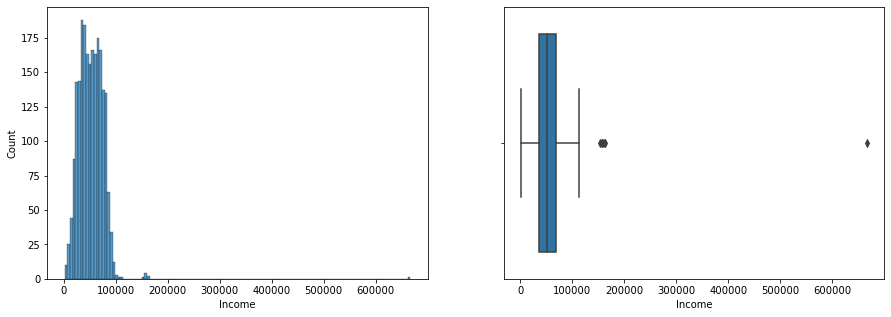

In [47]:
fig_dims = (15, 5) 
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='Income', data=df, ax=axs[0])
sns.boxplot(x='Income', data=df,ax=axs[1])

<AxesSubplot:xlabel='Recency'>

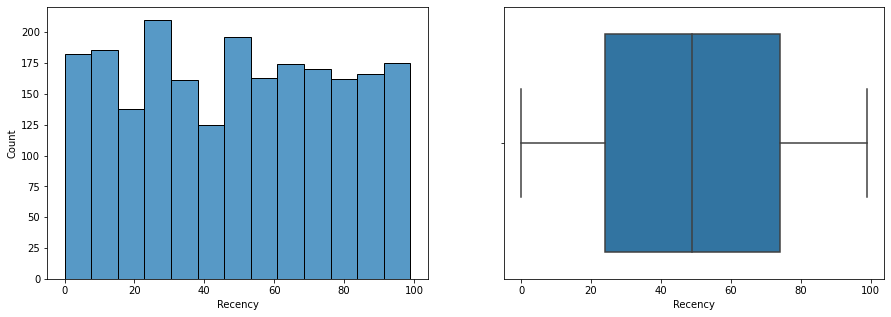

In [48]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='Recency', data=df, ax=axs[0])
sns.boxplot(x='Recency', data=df,ax=axs[1])

<AxesSubplot:xlabel='Age'>

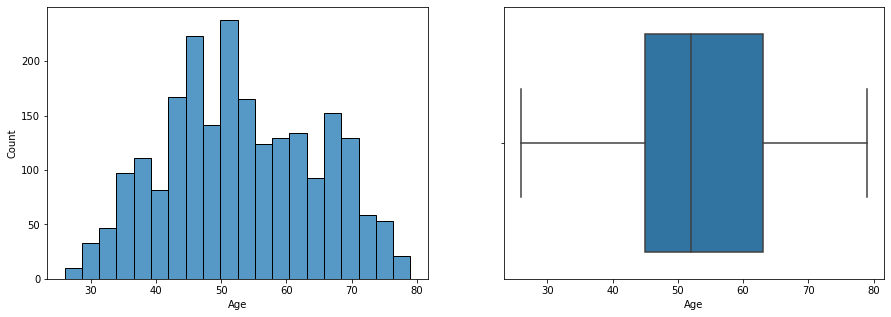

In [49]:
fig_dims = (15, 5) 
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='Age', data=df, ax=axs[0])
sns.boxplot(x='Age', data=df,ax=axs[1])

<AxesSubplot:xlabel='Numof'>

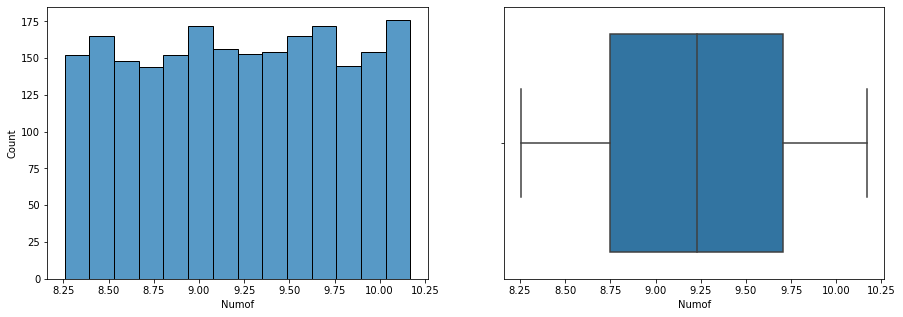

In [50]:
fig_dims = (15, 5) 
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='Numof', data=df, ax=axs[0])
sns.boxplot(x='Numof', data=df,ax=axs[1])

Observation:-

Numeric fields - 'Income','Age' ,'Recency' and 'Numof' show a symmetrical distribution. 'Numof', 'Recency' and 'Age' do not have any outliers. Income have outliers.

<AxesSubplot:xlabel='Education', ylabel='count'>

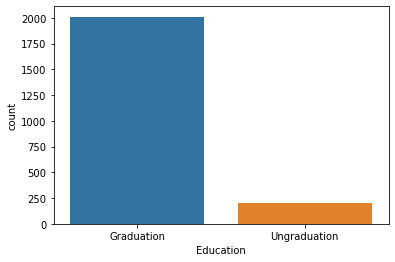

In [51]:
sns.countplot(x='Education', data=df)

Maximum candidates are with Graduation Education.

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

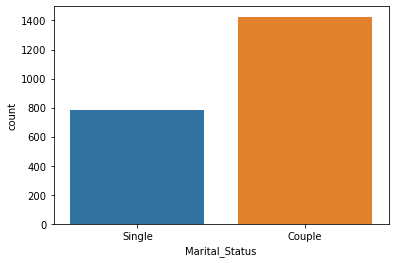

In [52]:
sns.countplot(x='Marital_Status', data=df)

Maximum candidates are with Couple Marital_Status.

<AxesSubplot:xlabel='Recency', ylabel='count'>

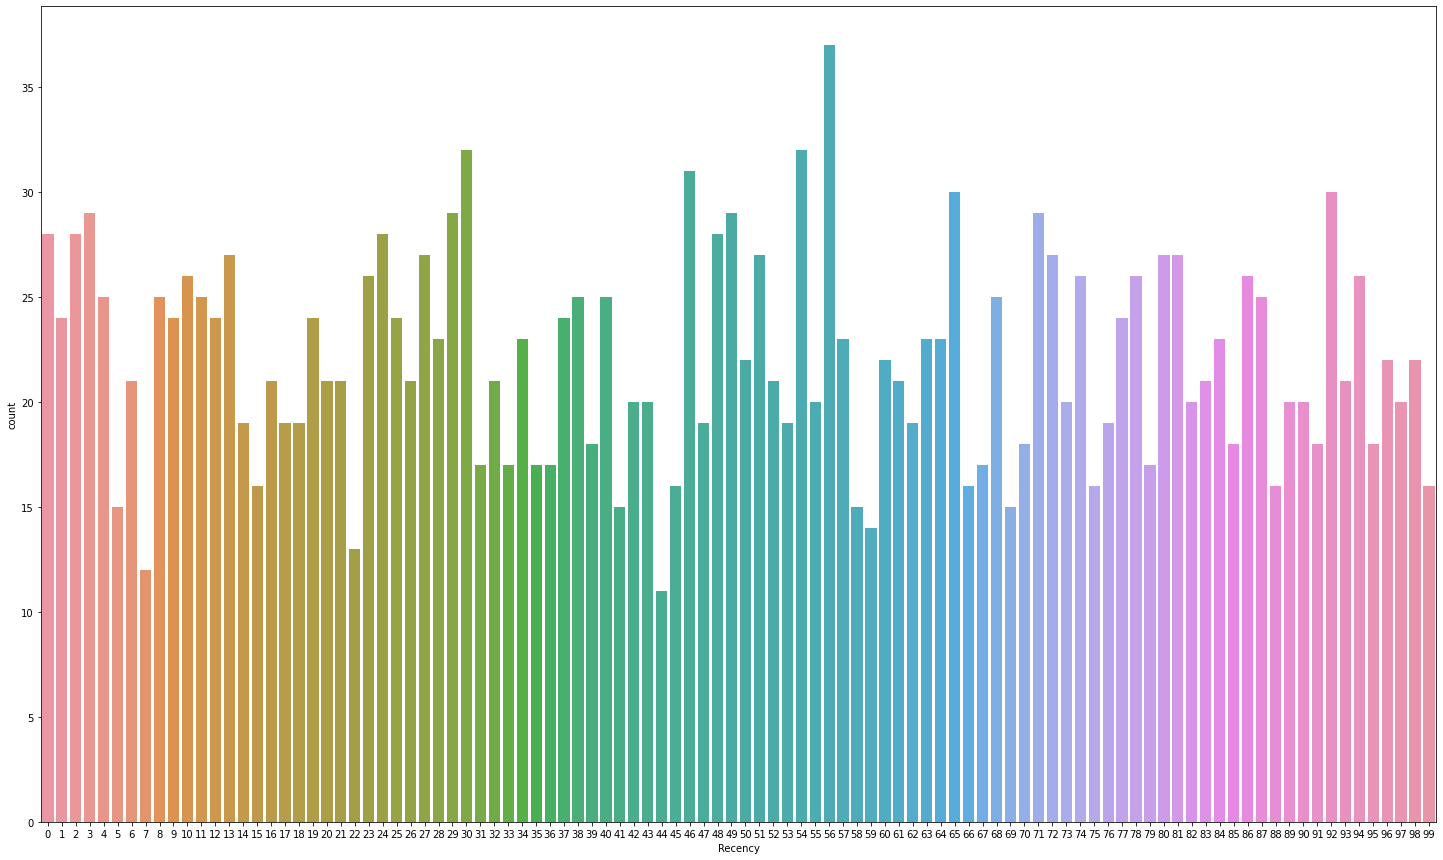

In [53]:
plt.subplots(figsize = (25,15))
sns.countplot(x='Recency', data=df)

Maximum value is 58 with Recency.

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='count'>

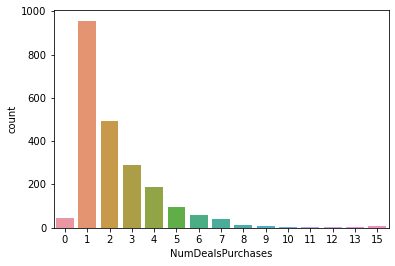

In [54]:
sns.countplot(x='NumDealsPurchases', data=df)

Maximum value is 1 with NumDealsPurchases.

<AxesSubplot:xlabel='NumWebPurchases', ylabel='count'>

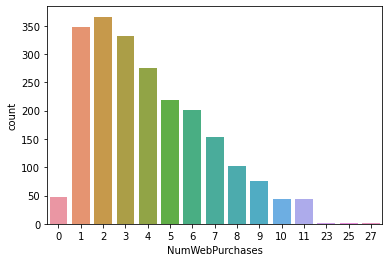

In [55]:
sns.countplot(x='NumWebPurchases', data=df)

Maximum value is 2 with NumWebPurchases.

<AxesSubplot:xlabel='NumCatalogPurchases', ylabel='count'>

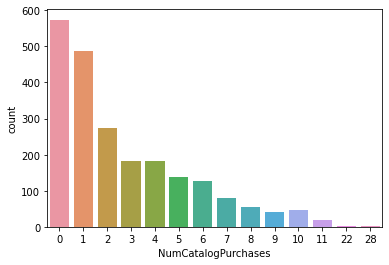

In [56]:
sns.countplot(x='NumCatalogPurchases', data=df)

Maximum value is 0 with NumCatalogPurchases.

<AxesSubplot:xlabel='NumStorePurchases', ylabel='count'>

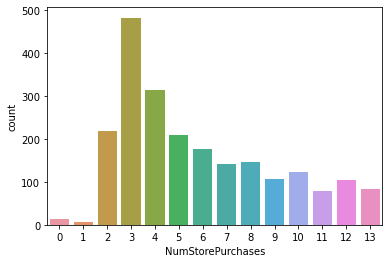

In [57]:
sns.countplot(x='NumStorePurchases', data=df)

Maximum value is 3 with NumStorePurchases.

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='count'>

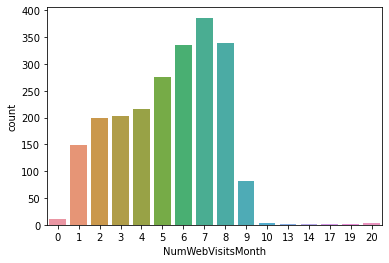

In [58]:
sns.countplot(x='NumWebVisitsMonth', data=df)

Maximum value is 7 with NumWebVisitsMonth.

<AxesSubplot:xlabel='Complain', ylabel='count'>

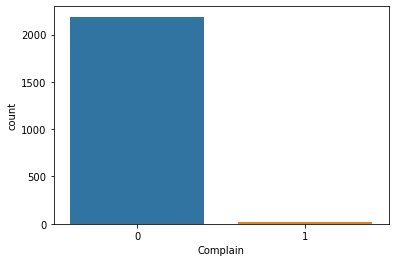

In [59]:
sns.countplot(x='Complain', data=df)

Maximum value is 0 with Complain.  

<AxesSubplot:xlabel='Response', ylabel='count'>

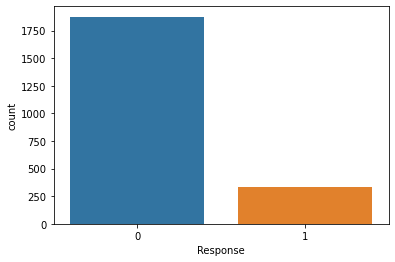

In [60]:
sns.countplot(x='Response', data=df)

Maximum is 0 value Response.

In [61]:
plt.subplots(figsize = (25,15))
sns.countplot(x='Age', data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

Maximum is 46 Value Age.

In [62]:
sns.countplot(x='totalchi', data=df)

<AxesSubplot:xlabel='totalchi', ylabel='count'>

Maximum is 1 Value totalchi.

In [63]:
df_num = df.select_dtypes(exclude='object')
num_list = df_num.columns
num_list

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'totalchi', 'Numof', 'AcceptedCmp'],
      dtype='object')

In [64]:
len(num_list)

19

In [65]:
df_cat = df.select_dtypes(include='object')
cat_list = df_cat.columns
cat_list

Index(['Education', 'Marital_Status'], dtype='object')

In [66]:
len(cat_list)

2

In [67]:
sns.pairplot(vars=num_list,data=df)

Observation:-
There is a specific pattern observed between 'NumCatalogPurchases' and 'MntMeatProducts'. As the 'Income' increases, 'NumWebVisitsMonth' decreases.
Also, it is observed that as the 'NumCatalogPurchases' cost increases, 'MntMeatProducts' also increases.

In [68]:
corr = df.corr(method='pearson')
corr

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
Income               1.000000 -0.003882  0.577754   0.430171         0.583724   
Recency             -0.003882  1.000000  0.015052  -0.005390         0.022089   
MntWines             0.577754  0.015052  1.000000   0.385767         0.566546   
MntFruits            0.430171 -0.005390  0.385767   1.000000         0.546756   
MntMeatProducts      0.583724  0.022089  0.566546   0.546756         1.000000   
MntFishProducts      0.438511  0.000768  0.397004   0.592749         0.573151   
MntSweetProducts     0.441278  0.025778  0.391083   0.571436         0.535924   
MntGoldProds         0.325441  0.018924  0.392587   0.393243         0.358218   
NumDealsPurchases   -0.082098  0.003831  0.010465  -0.134159        -0.120242   
NumWebPurchases      0.387607 -0.005670  0.553432   0.302049         0.306030   
NumCatalogPurchases  0.588443  0.023290  0.632881   0.485557         0.732896   
NumStorePurchases    0.530594 -0.000113  0.641675   0.459619         0.487035   
NumWebVisitsMonth   -0.552398 -0.018005 -0.320400  -0.417651        -0.538657   
Complain            -0.024888  0.005780 -0.036426  -0.003031        -0.021034   
Response             0.133562 -0.200136  0.247162   0.122742         0.238481   
Age                  0.162001  0.012747  0.162629   0.013492         0.031648   
totalchi            -0.292395  0.020537 -0.352537  -0.395382        -0.504032   
Numof               -0.018106  0.025959  0.168383   0.068806         0.089931   
AcceptedCmp          0.307760 -0.013451  0.510439   0.155791         0.306001   

                     MntFishProducts  MntSweetProducts  MntGoldProds  \
Income                      0.438511          0.441278      0.325441   
Recency                     0.000768          0.025778      0.018924   
MntWines                    0.397004          0.391083      0.392587   
MntFruits                   0.592749          0.571436      0.393243   
MntMeatProducts             0.573151          0.535924      0.358218   
MntFishProducts             1.000000          0.583458      0.426108   
MntSweetProducts            0.583458          1.000000      0.356442   
MntGoldProds                0.426108          0.356442      1.000000   
NumDealsPurchases          -0.143216         -0.122097      0.052460   
NumWebPurchases             0.299241          0.333954      0.407991   
NumCatalogPurchases         0.532362          0.495932      0.442525   
NumStorePurchases           0.457643          0.454964      0.390411   
NumWebVisitsMonth          -0.446091         -0.422985     -0.246298   
Complain                   -0.019182         -0.020670     -0.030272   
Response                    0.107854          0.115693      0.140754   
Age                         0.041404          0.022919      0.061088   
totalchi                   -0.427714         -0.390105     -0.268447   
Numof                       0.082428          0.081490      0.162153   
AcceptedCmp                 0.175409          0.201475      0.196075   

                     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Income                       -0.082098         0.387607             0.588443   
Recency                       0.003831        -0.005670             0.023290   
MntWines                      0.010465         0.553432             0.632881   
MntFruits                    -0.134159         0.302049             0.485557   
MntMeatProducts              -0.120242         0.306030             0.732896   
MntFishProducts              -0.143216         0.299241             0.532362   
MntSweetProducts             -0.122097         0.333954             0.495932   
MntGoldProds                  0.052460         0.407991             0.442525   
NumDealsPurchases             1.000000         0.241624            -0.010748   
NumWebPurchases               0.241624         1.000000             0.385911   
NumCatalogPurchases          -0.010748         0.385911             1.000000   
N

In [69]:
plt.subplots(figsize = (25,15))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

Observation
Correlation matrix gives us a similar representation as the pairplot.
We observe a positive correlation between 'NumCatalogPurchases' and 'MntMeatProducts' and a negative correlation between 'Income' and 'NumWebVisitsMonth'.

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
le = LabelEncoder()

In [72]:
df[cat_list] = df[cat_list].apply(le.fit_transform)

In [73]:
df.head()

Education  Marital_Status   Income  Recency  MntWines  MntFruits  \
0          0               1  58138.0       58       635         88   
1          0               1  46344.0       38        11          1   
2          0               0  71613.0       26       426         49   
3          0               0  26646.0       26        11          4   
4          0               0  58293.0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   
3               20               10                 3             5  ...   
4              118               46                27            15  ...   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   Complain  Response  Age  totalchi      Numof  AcceptedCmp  
0         0         1   65         0  10.071789          0.0  
1         0         0   68         2   8.565941          0.0  
2         0         0   57         0   9.110784          0.0  
3         0         0   38         1   8.637126          0.0  
4         0         0   41         1   8.697360          0.0  

[5 rows x 21 columns]

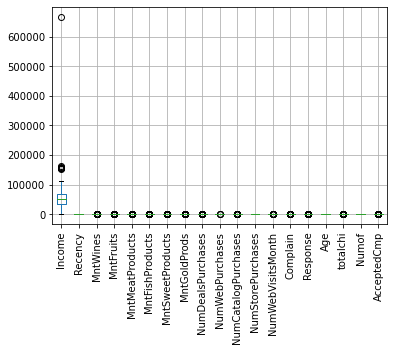

In [74]:
df[num_list].boxplot()
plt.xticks(rotation=90)
plt.show()

In [75]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    # calculating IQR range
    IQR=q3-q1
    lower_bound=q1-(1.5*IQR)
    upper_bound=q3+(1.5*IQR)
    #capping outliters
    return x.apply(lambda y : upper_bound if y > upper_bound else y).apply(lambda y : lower_bound if y < lower_bound else y)

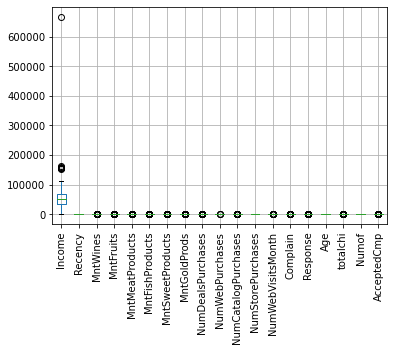

In [76]:
df[num_list].boxplot()
plt.xticks(rotation=90)
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2208 non-null   int32  
 1   Marital_Status       2208 non-null   int32  
 2   Income               2208 non-null   float64
 3   Recency              2208 non-null   int64  
 4   MntWines             2208 non-null   int64  
 5   MntFruits            2208 non-null   int64  
 6   MntMeatProducts      2208 non-null   int64  
 7   MntFishProducts      2208 non-null   int64  
 8   MntSweetProducts     2208 non-null   int64  
 9   MntGoldProds         2208 non-null   int64  
 10  NumDealsPurchases    2208 non-null   int64  
 11  NumWebPurchases      2208 non-null   int64  
 12  NumCatalogPurchases  2208 non-null   int64  
 13  NumStorePurchases    2208 non-null   int64  
 14  NumWebVisitsMonth    2208 non-null   int64  
 15  Complain             2208 non-null   i

Logistic Regression

In [78]:
x=df.drop('Response',axis=1)
y=df.Response

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.3, random_state=6)

In [80]:
logreg = LogisticRegression(max_iter=700)
logreg.fit(X_train,Y_train)

LogisticRegression(max_iter=700)

In [81]:
logreg.score(X_train,Y_train)

0.8673139158576052

In [82]:
logreg.score(X_test,Y_test)

0.8476621417797888

In [83]:
Y_train_predict = logreg.predict(X_train)
Y_test_predict = logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


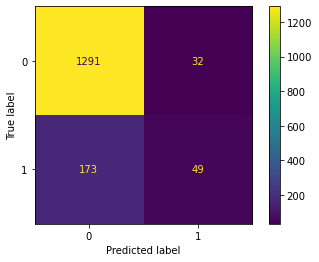

In [84]:
plot_confusion_matrix(logreg,X_train,Y_train)

In [85]:
print(classification_report(Y_train,Y_train_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1323
           1       0.60      0.22      0.32       222

    accuracy                           0.87      1545
   macro avg       0.74      0.60      0.62      1545
weighted avg       0.84      0.87      0.84      1545



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


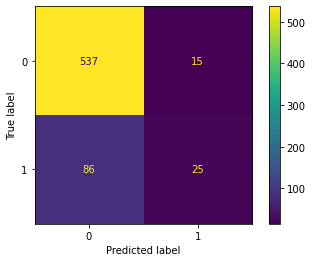

In [86]:
plot_confusion_matrix(logreg,X_test,Y_test)

In [87]:
print(classification_report(Y_test,Y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       552
           1       0.62      0.23      0.33       111

    accuracy                           0.85       663
   macro avg       0.74      0.60      0.62       663
weighted avg       0.82      0.85      0.82       663



In [88]:
df_pred = pd.DataFrame(Y_test.values, columns=['Actual'])
df_pred['Class_Pred'] = Y_test_predict
df_pred['Prob_Pred_1'] = logreg.predict_proba(X_test)[:,1]
df_pred.head()

Actual  Class_Pred  Prob_Pred_1
0       0           0     0.087665
1       0           0     0.082871
2       0           1     0.855025
3       0           0     0.051659
4       0           0     0.070818

<AxesSubplot:xlabel='Class_Pred', ylabel='Prob_Pred_1'>

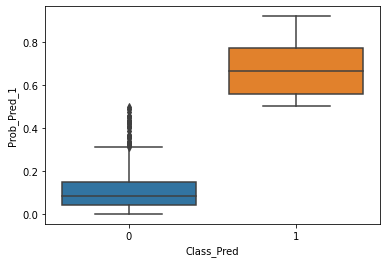

In [89]:
sns.boxplot(x='Class_Pred', y='Prob_Pred_1', data=df_pred)

<AxesSubplot:xlabel='Actual', ylabel='Prob_Pred_1'>

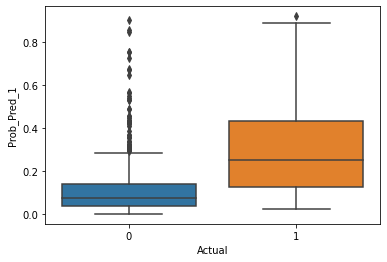

In [90]:
sns.boxplot(x='Actual', y='Prob_Pred_1', data=df_pred)

AUC: 0.806


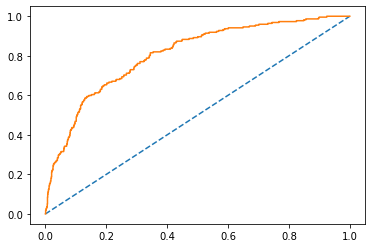

In [91]:
probs = logreg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.802


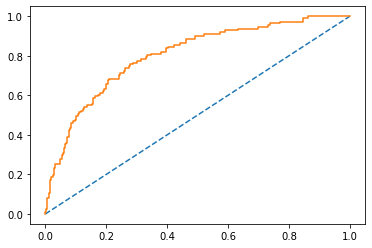

In [92]:
probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

Conclusion:-
Overall accuracy of the built logistic regression model is at 85% on the test dataset.
Recall for both class 0 and class 1 is 0.97 and 0.23 respectively.
Accuracy in train dataset is at 87% and test dataset is at 85%. As there is not much difference, there is no overfitting in the model.
AUC for test data is at 0.802.
Considering the evaluation, we can consider the above model as the final one.

Decision Tree

In [93]:
x=df.drop(columns='Response')
y=df['Response']

In [94]:
clf=DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [95]:
from sklearn import tree
train_char_lable=['No','Yes']
ld_Tree_File=open('ld_Tree_File.dot','w')
dot_data=tree.export_graphviz(clf,out_file=ld_Tree_File, feature_names=list(X_train),class_names=list(train_char_lable))
ld_Tree_File.close()

In [96]:
Y_pred_train= clf.predict(X_train)
Y_pred_test= clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


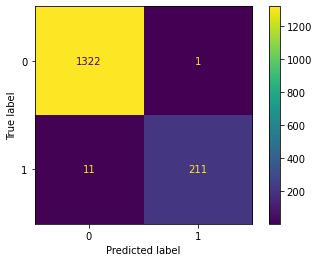

In [97]:
plot_confusion_matrix(clf,X_train,Y_train)

In [98]:
print(classification_report(Y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1323
           1       1.00      0.95      0.97       222

    accuracy                           0.99      1545
   macro avg       0.99      0.97      0.98      1545
weighted avg       0.99      0.99      0.99      1545



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


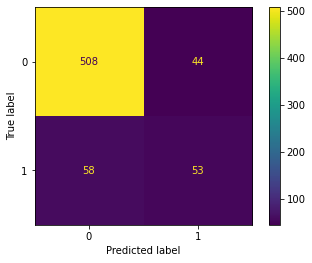

In [99]:
plot_confusion_matrix(clf,X_test,Y_test)

In [100]:
print(classification_report(Y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1323
           1       1.00      0.95      0.97       222

    accuracy                           0.99      1545
   macro avg       0.99      0.97      0.98      1545
weighted avg       0.99      0.99      0.99      1545



In [101]:
clf1=DecisionTreeClassifier(max_depth=8, min_samples_leaf=22, min_samples_split=66)
clf1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=22, min_samples_split=66)

In [102]:
from sklearn import tree
train_char_label=['No','Yes']
id_Tree_File = open('id_Tree_File.dot','w')
dot_data = tree.export_graphviz(clf1,out_file=id_Tree_File,feature_names=list(X_train),class_names=list(train_char_label))
id_Tree_File.close()

In [103]:
Y_pred_train= clf1.predict(X_train)
Y_pred_test= clf1.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


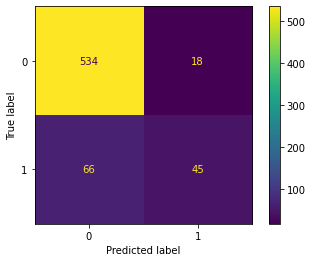

In [104]:
plot_confusion_matrix(clf1,X_test,Y_test)

In [105]:
print(classification_report(Y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1323
           1       0.73      0.43      0.54       222

    accuracy                           0.89      1545
   macro avg       0.82      0.70      0.74      1545
weighted avg       0.88      0.89      0.88      1545



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


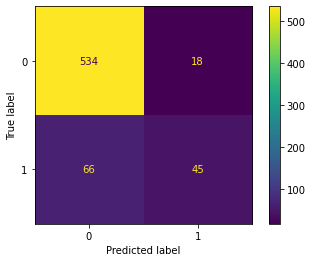

In [106]:
plot_confusion_matrix(clf1,X_test,Y_test)

In [107]:
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       552
           1       0.71      0.41      0.52       111

    accuracy                           0.87       663
   macro avg       0.80      0.69      0.72       663
weighted avg       0.86      0.87      0.86       663



Conclusion:- Overall accuracy of the built Decision Tree regression model is at 87% on the test dataset. Recall for both class 0 and class 1 is 0.97 and 0.41 respectively. Accuracy in train dataset is at 89% and test dataset is at 87%. As there is not much difference, there is no overfitting in the model. Considering the evaluation, we can consider the above model as the final one.

Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rfc=RandomForestClassifier(n_estimators=101, random_state=1)

In [110]:
rfc1=RandomForestClassifier(n_estimators=201, random_state=6, oob_score=True)

In [111]:
rfc1.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=201, oob_score=True, random_state=6)

In [112]:
rfc1.oob_score_

0.8828478964401294

In [113]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=101, random_state=1)

In [114]:
Y_pred_train_rfc=rfc.predict(X_train)
Y_pred_test_rfc=rfc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


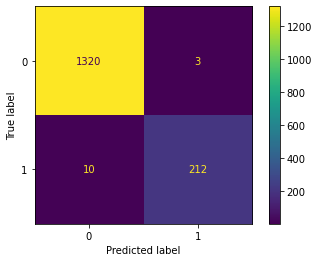

In [115]:
plot_confusion_matrix(rfc, X_train, Y_train)

In [116]:
print(classification_report(Y_train,Y_pred_train_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1323
           1       0.99      0.95      0.97       222

    accuracy                           0.99      1545
   macro avg       0.99      0.98      0.98      1545
weighted avg       0.99      0.99      0.99      1545



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


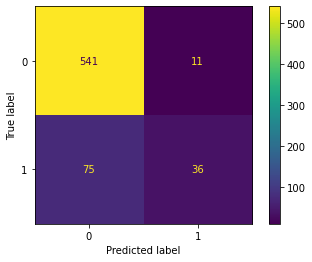

In [117]:
plot_confusion_matrix(rfc,X_test,Y_test)

In [118]:
print(classification_report(Y_test,Y_pred_test_rfc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       552
           1       0.77      0.32      0.46       111

    accuracy                           0.87       663
   macro avg       0.82      0.65      0.69       663
weighted avg       0.86      0.87      0.85       663



In [119]:
rfc1.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=201, oob_score=True, random_state=6)

In [120]:
Y_pred_train_rfc1=rfc1.predict(X_train)

In [121]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth':[8,9,10],
    'max_features':[5,6],
    'min_samples_leaf':[22,24,26],
    'min_samples_split':[60,70,80],
    'n_estimators':[101,201]
}
rfc1=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rfc1, param_grid=param_grid,cv=5)

In [122]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10], 'max_features': [5, 6],
                         'min_samples_leaf': [22, 24, 26],
                         'min_samples_split': [60, 70, 80],
                         'n_estimators': [101, 201]})

In [123]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 22,
 'min_samples_split': 60,
 'n_estimators': 101}

In [124]:
rfc1=RandomForestClassifier(n_estimators=101, max_depth=9, max_features=6, min_samples_leaf=22, min_samples_split=60, random_state=6)

In [125]:
best_model=grid_search.best_estimator_

In [126]:
Y_pred_train_rfc2=best_model.predict(X_train)
Y_pred_test_rfc2=best_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


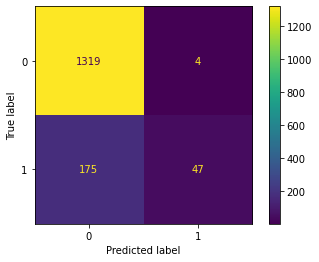

In [127]:
plot_confusion_matrix(best_model, X_train, Y_train)

In [128]:
print(classification_report(Y_train, Y_pred_train_rfc2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1323
           1       0.92      0.21      0.34       222

    accuracy                           0.88      1545
   macro avg       0.90      0.60      0.64      1545
weighted avg       0.89      0.88      0.85      1545



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


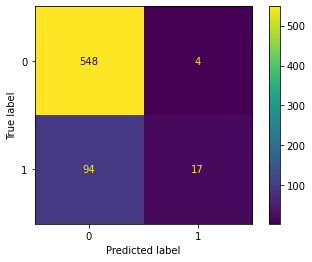

In [129]:
plot_confusion_matrix(best_model, X_test, Y_test)

In [130]:
print(classification_report(Y_test, Y_pred_test_rfc2))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       552
           1       0.81      0.15      0.26       111

    accuracy                           0.85       663
   macro avg       0.83      0.57      0.59       663
weighted avg       0.85      0.85      0.81       663



Conclusion:-
Overall accuracy of the built Random Forest regression model is at 85% on the test dataset.
Recall for both class 0 and class 1 is 0.99 and 0.15 respectively.
Accuracy in train dataset is at 88% and test dataset is at 85%. As there is not much difference, there is no overfitting in the model.
Considering the evaluation, we can consider the above model as the final one.